In [1]:
import math
import random
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split

In [2]:
def norm(x):
  return (x - mean) / std

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DashaMaga/dataset/dataset.csv', sep=',', index_col=0)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,lmbd_value
0,0.287882,0.358900,0.417177,0.420615,2.176274,2.547334,2.749675,4.413766,5.147327,5.588625,...,764.252390,764.701606,764.955840,765.046379,765.190981,765.392485,765.450624,766.557403,766.767779,2.610666
1,0.282785,0.763930,0.979444,1.353131,2.196647,3.503590,4.693699,5.142517,5.380512,5.906518,...,785.871161,786.359956,786.833674,786.907084,786.908232,786.952464,787.126810,787.300328,788.386670,2.489045
2,4.828420,5.040160,11.100360,11.759070,14.318093,15.036482,22.986958,24.553382,25.237794,26.947498,...,4522.863863,4531.423348,4534.668196,4537.634365,4541.019534,4541.382727,4543.098235,4545.924197,4546.604726,0.415514
3,0.481491,2.859642,3.025114,3.222500,3.561210,3.580307,4.197862,4.720768,5.240613,6.012294,...,1333.512573,1334.059284,1337.896729,1337.981594,1338.330075,1339.250280,1339.317774,1340.432675,1340.440459,1.465575
4,2.389578,4.431217,4.784558,6.399783,10.868817,13.401857,14.443343,14.560604,16.064135,16.227115,...,2873.520887,2873.804806,2874.179903,2874.482981,2875.113818,2875.402749,2877.656258,2880.363239,2881.005411,0.672514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.431355,0.847413,1.073438,1.709112,1.946114,2.533354,3.325249,3.360283,3.706985,4.013559,...,864.337398,865.378902,866.034641,867.303353,869.263218,870.385576,870.990275,871.637267,871.885881,2.253612
1996,0.208408,0.538054,0.606125,1.912271,2.166335,2.340310,2.519947,2.787764,3.091199,3.480129,...,916.874543,916.933108,916.952439,918.248529,918.367751,919.480984,919.574253,921.448872,922.007911,2.181834
1997,0.919340,2.473062,7.977780,15.587597,15.859919,16.125506,18.078679,21.384289,23.704891,24.618281,...,4668.078240,4669.234331,4673.411741,4687.276839,4691.808108,4694.613695,4707.937070,4709.396788,4710.242317,0.424900
1998,0.009365,0.438068,0.483075,0.774607,0.871129,0.894272,1.443555,2.076420,2.375171,2.895283,...,677.749939,678.690688,678.721363,678.865215,679.095947,679.511723,679.631344,679.777850,680.183032,2.952734


In [5]:
X = df.drop('lmbd_value', axis = 1)

In [6]:
y = df['lmbd_value']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [8]:
mean = X_train.mean(axis = 0)
std = X_train.std(axis = 0)

X_train -= mean
X_train /= std

In [9]:
X_train = norm(X_train);
X_test = norm(X_test);

In [10]:
# Приводим значения ответов в диапазон от 0 до 1
min_y = y_train.min()

y_train = y_train - min_y #смещаем ответы к 0, вычитая минимальное значение
max_y = y_train.max() #берем максимум от уже "опущенных" вниз на min_y данных 
y_train /= max_y #приводим к 1 обучающую выборку

#нормируем ответы проверочной выборки, используя статистику min_y и max_y обучающей 
y_test = y_test - min_y
y_test /= max_y

In [11]:
# Приводим значения ответов в диапазон от 0 до 1
min_y = y_train.min()
max_y = y_train.max() - min_y #"опустим" максимум на min_y

y_train = (y_train - min_y) / max_y #отклонение от минимума к амплитуде
y_test = (y_test - min_y) / max_y

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # sigmoid, т.к. данные от 0 до 1

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 132,289
Trainable params: 132,289
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Т.к. задача регрессии, удобнее использовать mean square error(средне-квадратичная ошибка).
# В качестве метрики берем mean absolute error (средний модуль ошибки)
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=100, 
                    validation_split=0.1, 
                    verbose=2)

Epoch 1/100
38/38 - 2s - loss: 0.0889 - mae: 0.2582 - val_loss: 0.0863 - val_mae: 0.2558 - 2s/epoch - 56ms/step
Epoch 2/100
38/38 - 0s - loss: 0.0885 - mae: 0.2594 - val_loss: 0.0871 - val_mae: 0.2567 - 299ms/epoch - 8ms/step
Epoch 3/100
38/38 - 0s - loss: 0.0882 - mae: 0.2588 - val_loss: 0.0864 - val_mae: 0.2559 - 381ms/epoch - 10ms/step
Epoch 4/100
38/38 - 0s - loss: 0.0884 - mae: 0.2593 - val_loss: 0.0864 - val_mae: 0.2559 - 316ms/epoch - 8ms/step
Epoch 5/100
38/38 - 0s - loss: 0.0883 - mae: 0.2591 - val_loss: 0.0863 - val_mae: 0.2558 - 340ms/epoch - 9ms/step
Epoch 6/100
38/38 - 0s - loss: 0.0882 - mae: 0.2592 - val_loss: 0.0863 - val_mae: 0.2558 - 278ms/epoch - 7ms/step
Epoch 7/100
38/38 - 0s - loss: 0.0883 - mae: 0.2593 - val_loss: 0.0864 - val_mae: 0.2559 - 294ms/epoch - 8ms/step
Epoch 8/100
38/38 - 0s - loss: 0.0882 - mae: 0.2590 - val_loss: 0.0865 - val_mae: 0.2560 - 368ms/epoch - 10ms/step
Epoch 9/100
38/38 - 0s - loss: 0.0881 - mae: 0.2590 - val_loss: 0.0867 - val_mae: 0.2563

In [ ]:
# Делаем прогноз. Возвращается копия предсказания в виде одномерного массива
pred = model.predict(X_test).flatten() 

# Возвращаем к прежнему размеру
pred = pred * max_y + min_y 
y_test = y_test * max_y + min_y

21/21 [==============================] - 0s 3ms/step


In [ ]:
# Средний модуль отклонения 
err = np.mean(abs(pred - y_test))
print(err)

0.25247268465623135


In [ ]:
# Средняя цена по выборке
print(np.mean(y_test))

0.4977827766530946


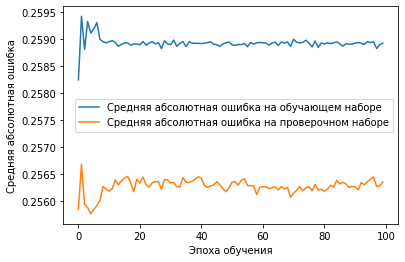

In [ ]:
# Считаем графики ошибки
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

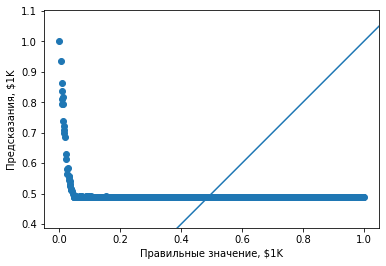

In [ ]:
# Разброс предсказаний может показать перекос, если есть
plt.scatter(y_test, pred) 
plt.xlabel('Правильные значение, $1K')
plt.ylabel('Предсказания, $1K')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

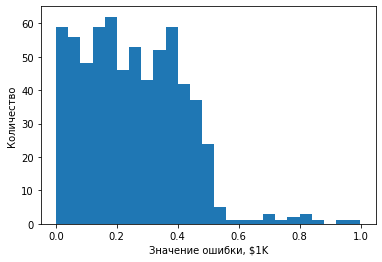

In [ ]:
#Разность предсказанного и правильного ответа
error = pred - y_test
#Построение гистограммы
plt.hist(abs(error), bins = 25)
plt.xlabel("Значение ошибки, $1K")
plt.ylabel("Количество")
plt.show()

In [ ]:
y_test

1860    0.362485
353     0.274118
1333    0.444349
905     0.230864
1289    0.095919
          ...   
118     0.420498
1249    0.553263
1993    0.122030
522     0.380704
513     0.378687
Name: lmbd_value, Length: 660, dtype: float64

In [1]:
import math

pow(120, 120) * math.exp(-120) / math.factorial(120)

0.03639299938468838